In [3]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300).fit(iris_df)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [8]:
iris_df['cluster'] = kmeans.labels_
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [10]:
iris_df['target'] = iris.target
iris_result = iris_df.groupby(['target', 'cluster']).count()
print(iris_result)

                sepal length (cm)  sepal width (cm)  petal length (cm)  \
target cluster                                                           
0      1                       50                50                 50   
1      0                       48                48                 48   
       2                        2                 2                  2   
2      0                       14                14                 14   
       2                       36                36                 36   

                petal width (cm)  
target cluster                    
0      1                      50  
1      0                      48  
       2                       2  
2      0                      14  
       2                      36  


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

iris_df['pca_x'] = pca_transformed[:, 0]
iris_df['pca_y'] = pca_transformed[:, 1]

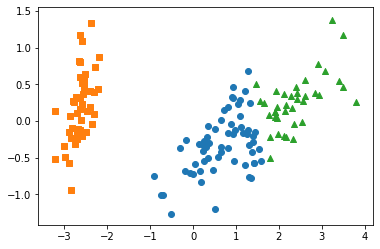

In [13]:
m0_ind = iris_df[iris_df['cluster']==0].index
m1_ind = iris_df[iris_df['cluster']==1].index
m2_ind = iris_df[iris_df['cluster']==2].index

plt.scatter(x=iris_df.loc[m0_ind, 'pca_x'], y=iris_df.loc[m0_ind, 'pca_y'], marker='o')
plt.scatter(x=iris_df.loc[m1_ind, 'pca_x'], y=iris_df.loc[m1_ind, 'pca_y'], marker='s')
plt.scatter(x=iris_df.loc[m2_ind, 'pca_x'], y=iris_df.loc[m2_ind, 'pca_y'], marker='^')

In [14]:
# test용 dataset 만들기
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8)
print(X.shape, y.shape)

(200, 2) (200,)


In [15]:
# y값의 분포 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

[0 1 2] [67 67 66]


In [17]:
Cluster_df = pd.DataFrame(X, columns=['ftr1', 'ftr2'])
Cluster_df['target'] = y
Cluster_df.head()

,ftr1,ftr2,target
0,-7.998620,3.123381,1
1,0.722748,10.227796,2
2,1.769729,10.593020,2
3,-3.857193,7.053950,0
4,0.699799,9.890255,2


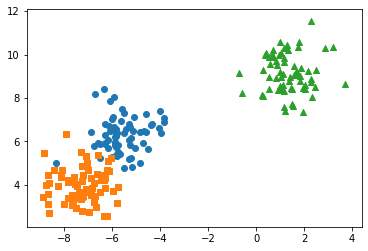

In [18]:
target_list = np.unique(y)
markers = ['o', 's', '^', 'P', 'D']

for target in target_list:
    c_target = Cluster_df[Cluster_df['target']==target]
    plt.scatter(x=c_target['ftr1'], y=c_target['ftr2'], marker=markers[target])
    
plt.show()

In [20]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200)
cluster_labels = kmeans.fit_predict(X)
Cluster_df['kmeans'] = cluster_labels

In [21]:
centers = kmeans.cluster_centers_
print(centers)

[[-5.60474787  6.27469702]
 [ 1.3374182   9.12719048]
 [-7.32074307  3.92335531]]
